In [1]:
import pandas as pd
df=pd.read_csv("585154-Sally_Wang.csv")

In [5]:
df.head()

row ID  add_these_pw_job_title_9089 agent_city  \
0     138                          NaN   Brooklyn   
1     435                          NaN    Seattle   
2     816                          NaN   New York   
3    1196                          NaN   New York   
4    1273                          NaN   San Jose   

                          agent_firm_name agent_state  application_type  \
0   Law Offices of Gilbert C Ferrer, PLLC          NY               NaN   
1              MacDonald Hoague & Bayless          WA               NaN   
2  Fragomen, Del Rey, Bernsen & Loewy LLP    NEW YORK               NaN   
3  Fragomen, Del Rey, Bernsen & Loewy LLP    NEW YORK               NaN   
4                      Graham Adair, Inc.  CALIFORNIA               NaN   

   case_no    case_number case_received_date        case_status  \
0      NaN  A-16245-48815         19/09/2016          Certified   
1      NaN  A-15278-24948          9/10/2015  Certified-Expired   
2      NaN  A-15023-45044          3/02/2015          Certified   
3      NaN  A-14132-68520         14/05/2014  Certified-Expired   
4      NaN  A-14290-16728         23/10/2014  Certified-Expired   

               ...              ri_pvt_employment_firm_to  \
0              ...                                    NaN   
1              ...                                    NaN   
2              ...                                    NaN   
3              ...                                    NaN   
4              ...                                    NaN   

  ri_us_workers_considered  schd_a_sheepherder us_economic_sector  \
0                      NaN                   N                NaN   
1                        Y                   N                NaN   
2                      NaN                   N                NaN   
3                      NaN                   N                NaN   
4                      NaN                   N                NaN   

  wage_offer_from_9089 wage_offer_to_9089 wage_offer_unit_of_pay_9089  \
0           111,405.00                NaN                        Year   
1               115858             135858                        Year   
2           123,219.00                NaN                        Year   
3            77,626.00         130,000.00                        Year   
4            73,715.00          80,000.00                        Year   

  wage_offered_from_9089 wage_offered_to_9089 wage_offered_unit_of_pay_9089  
0                    NaN                  NaN                           NaN  
1                    NaN                  NaN                           NaN  
2                    NaN                  NaN                           NaN  
3                    NaN                  NaN                           NaN  
4                    NaN                  NaN                           NaN  

[5 rows x 155 columns]

In [11]:
def one_a_one(df):
    """Identifying the data types for first 30 attributes"""
    return df.dtypes.to_frame()[:30].reset_index().rename(columns={"index":"Attribute",0:"Data type"})

In [37]:
def one_b_d(df):
    """Binarise the foreign_worker_info_education"""
    import numpy as np
    out=np.where(df["foreign_worker_info_education"]=="Master's",0,1)
    out_series=pd.Series(out)
    return out_series
    

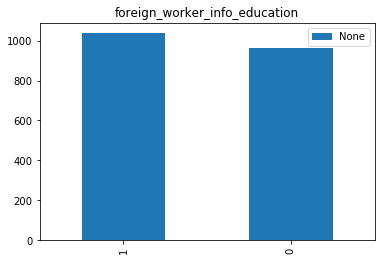

In [53]:
one_b_d(df).value_counts().plot(kind="bar",title="foreign_worker_info_education",legend=True)

z score 

In [29]:
def z_score(series):
    

In [54]:
from scipy.stats import zscore

In [58]:
z_col=np.where(df["foreign_worker_info_education"]=="Master's",0,1)
z_col=pd.Series(z_col)

In [59]:
z_col.to_frame().apply(zscore)

0
0    -1.036672
1     0.964625
2     0.964625
3     0.964625
4    -1.036672
5    -1.036672
6     0.964625
7     0.964625
8    -1.036672
9     0.964625
10   -1.036672
11    0.964625
12    0.964625
13   -1.036672
14    0.964625
15   -1.036672
16   -1.036672
17   -1.036672
18   -1.036672
19    0.964625
20    0.964625
21    0.964625
22    0.964625
23   -1.036672
24   -1.036672
25    0.964625
26   -1.036672
27   -1.036672
28   -1.036672
29    0.964625
...        ...
1970  0.964625
1971 -1.036672
1972  0.964625
1973  0.964625
1974  0.964625
1975 -1.036672
1976 -1.036672
1977 -1.036672
1978 -1.036672
1979 -1.036672
1980 -1.036672
1981 -1.036672
1982  0.964625
1983  0.964625
1984 -1.036672
1985  0.964625
1986 -1.036672
1987 -1.036672
1988 -1.036672
1989  0.964625
1990 -1.036672
1991  0.964625
1992  0.964625
1993  0.964625
1994  0.964625
1995  0.964625
1996  0.964625
1997 -1.036672
1998 -1.036672
1999  0.964625

[2000 rows x 1 columns]

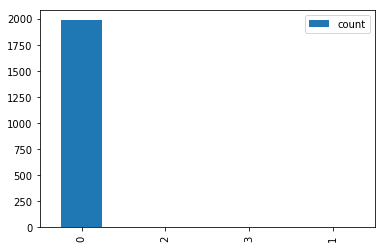

In [135]:
out.plot(kind='bar')


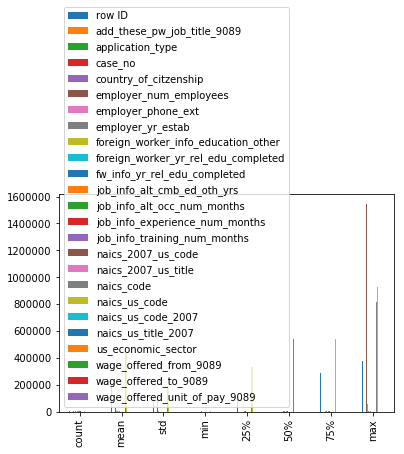

In [143]:
#def one_a_b()
df.describe().plot(kind='bar')

In [2]:
def one_b_a():
    """equi-width binning"""
#w = (max-min)/k
    maxx=df['employer_num_employees'].max()
    minn=df['employer_num_employees'].min()
    w=(maxx-minn)/4
    out=pd.cut(df['employer_num_employees'],4)
    out=out.value_counts().to_frame()
    out=out.reset_index().sort_values('index').rename(columns={'index':'Range','employer_num_employees':'count'})
    out.plot(kind='bar')
    return out



Range  count
0  (-1539.999, 385250.75]   1985
2   (385250.75, 770500.5]      7
3  (770500.5, 1155750.25]      0
1   (1155750.25, 1541000]      8

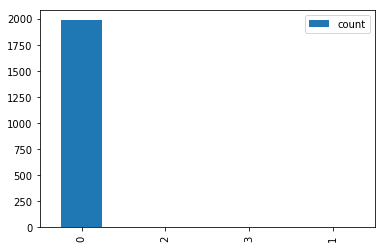

In [8]:
%matplotlib inline
one_b_a()

In [105]:
def one_b_b():
    """Use the following techniques to normalise the attribute employer_num_employees
    return a series and a dataframe
    """
    #round(df['employer_num_employees']/1541000,2)
    maxm=df['employer_num_employees'].max()
    out=df['employer_num_employees']/maxm
    
    return out,out.to_frame().apply(zscore)

In [98]:
def one_b_c():
    #Discretise the employer_num_employees
    pd.cut(df['employer_num_employees'],3)
    maxm=df['employer_num_employees'].max()
    out= pd.cut(df['employer_num_employees'], [0, 10, 100,2000,20000,maxm],labels=['Startup','Small_Scale','Medium_Scale','Large_Scale','Giant_Scale'])
    out.value_counts().plot(kind='bar')
    return out.value_counts()
#kleney manar

Giant_Scale     504
Medium_Scale    486
Large_Scale     476
Small_Scale     399
Startup         135
Name: employer_num_employees, dtype: int64

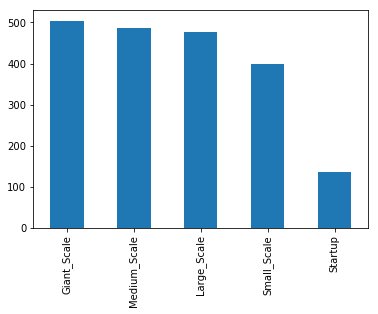

In [88]:
one_b_c()

In [9]:
"00101610093932"=="00101610093932"

True

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
def tfidf_vectorize(input_keywords_list):
    v = TfidfVectorizer()
    listr=v.fit_transform(input_keywords_list)
    #listr.toarray()
    print('listr',listr)
    feature_names=v.get_feature_names()
    print("feature_names",feature_names)
    return listr.toarray()

In [19]:
tfidf_matrix=tfidf_vectorize(["Payment","Check","API","Express Checkout","Image","Checkout","Link","New Payment"])

listr   (0, 7)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 3)	0.7664298449085388
  (3, 2)	0.6423280258820045
  (4, 4)	1.0
  (5, 2)	1.0
  (6, 5)	1.0
  (7, 7)	0.6423280258820045
  (7, 6)	0.7664298449085388
feature_names ['api', 'check', 'checkout', 'express', 'image', 'link', 'new', 'payment']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [21]:
clusters

[2, 4, 0, 1, 3, 1, 0, 2]

In [22]:
tfidf_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.64232803, 0.76642984, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.76642984, 0.64232803]])